# **Quantitative Structure-Activity Relationship (QSAR)**

**1. Représentation des données**

(a) analyser l’ensemble des données


*   Analyser chaque attribut.

* Proposer un prétraitement de vos données

* Sélectionner les 10 meilleurs attributs (donnez une justification statistique)

* Visualiser la distribution des 10 meilleurs attributs.



In [1]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel (r'QSAR_dataset.xlsx', sheet_name='data')
print(df.shape)
df.head()


(154, 76)


,SMILES,Class,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,a_nF,a_nH,balabanJ,bpol,CASA+,CASA-,chi0,chi0v,chi0v_C,chi0_C,chi1,chi1v,chi1v_C,chi1_C,DASA,DCASA,dens,density,diameter,dipole,h_logP,h_logS,logP(o/w),logS,mr,npr2,PC+,PC-,PEOE_VSA_NEG,PEOE_VSA_PNEG,PEOE_VSA_POL,PEOE_VSA_PPOS,petitjean,petitjeanSC,pmi,pmi2,pmi3,radius,rgyr,RPC-,rsynth,SlogP,SMR,std_dim1,std_dim2,std_dim3,TPSA,VAdjEq,VAdjMa,VDistEq,VDistMa,vdw_area,vdw_vol,vol,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
0,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,Class 2,41.283001,21.282999,622.40619,43,0,43.0,40,49.644451,14,0,27,0,7.465846,34.396999,212.404330,6834.02000,36.077351,18.021538,7.000000,7.077350,17.943377,8.760769,3.250000,3.288675,601.123230,6621.615700,2.066202,1.598682,15,8.873708,10.113732,-8.971474,12.89380,-9.36990,6.323788,0.997325,9.979999,-10.980,348.66699,27.133842,62.977699,35.843857,0.466667,0.875000,21944.05900,21172.36300,21229.14300,8,5.547328,0.081967,0.558140,6.9222,7.0426,5.374522,0.983466,0.944460,40.130001,0.266657,6.392317,3.673295,10.596491,399.21936,188.617540,345.125,421.45898,27.133842,357.37701,27.133842,3.610454,7.831075,-101.933951,-4.007604,713.09796,246
1,c12c(cccc1)cccc2,Class 2,22.934343,155.975430,156.69504,18,0,10.0,10,17.839369,10,0,0,8,1.973451,8.745656,187.170520,188.03406,6.811555,5.618802,5.618802,6.811555,4.966327,3.404701,3.404701,4.966327,0.719612,0.863535,0.914712,0.638040,5,0.000260,2.931160,-3.685163,3.12800,-3.26276,4.342181,0.718165,1.200000,-1.200,102.45631,0.000000,0.000000,0.000000,0.400000,0.666667,568.41663,408.21695,568.41663,3,2.105879,0.125000,1.000000,2.8398,4.3948,2.118184,1.508570,0.000282,0.000000,0.760167,4.459432,2.116608,6.334442,136.57939,112.753062,140.125,151.37508,0.000000,130.88504,0.000000,0.040120,0.087020,-1.132699,-0.044533,128.17400,50
2,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(...,Class -2,42.919998,38.976181,499.52170,22,0,22.0,22,21.868664,12,10,0,0,2.361498,4.200000,68.987846,884.15338,16.928204,17.338934,6.000000,6.928203,10.106836,8.919467,3.250000,4.333334,460.545500,815.165530,1.570589,1.236138,9,0.001460,10.476893,-10.128985,9.76200,-11.15416,9.404722,0.736670,1.770000,-1.770,295.81946,0.000000,0.000000,0.000000,0.444444,0.800000,7079.02200,5006.45560,6796.06200,5,3.767762,0.100000,0.000000,9.8876,10.1978,2.838786,1.731734,0.622705,0.000000,0.453077,5.523562,2.874708,8.679059,345.43402,154.487250,317.500,338.42563,0.000000,345.43402,0.000000,0.048171,0.104483,-1.360008,-0.053470,498.66199,118
3,ClC1(Cl)C2(Cl)C(Cl)=C(Cl)C1(Cl)C1C2C(Cl)C2(Cl)...,Class -2,38.509171,46.270092,421.43369,23,1,19.0,16,38.822643,10,8,0,4,1.957714,9.648828,110.122820,1003.01210,14.171208,14.788796,5.309401,5.464102,8.559237,8.467808,3.404701,3.565384,375.163570,892.889340,1.552964,1.264930,6,0.468017,5.372310,-6.204517,6.69836,-7.35228,7.610351,0.935585,2.380000,-2.380,239.15933,2.503756,2.503756,0.000000,0.333333,0.500000,4013.81350,2971.49510,3176.08280,4,3.077628,0.124370,0.105263,5.0192,8.0415,1.968067,1.369170,1.228131,12.530000,0.534751,5.459432,2.389870,8.277138,271.13144,147.333053,272.875,293.98846,2.503756,263.09042,2.503756,4.973507,10.787536,-140.417009,-5.520592,423.76498,130
4,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(...,Class -2,41.406792,56.392834,480.49115,22,0,21.0,21,26.558620,12,9,0,1,2.275799,4.873207,98.292709,837.49609,16.057961,16.282391,6.077350,7.057960,9.679316,8.429871,3.327350,4.483163,424.098330,739.203370,1.526402,1.198143,9,0.456580,9.794951,-9.442112,9.21100,-10.41987,9.055549,0.953644,1.743000,-1.743,278.49243,0.000000,0.000000,0.000000,0.444444,0.800000,6711.78080,5598.17870,5870.30220,5,3.802405,0.101549,0.000000,9.2342,9.6968,2.854973,1.266626,1.216203,0.000000,0.468276,5.459432,2.887716,8.534258,327.85260,151.909791,304.125,330.35486,0.000000,327.14081,0.000000,0.137724,0.298724,-3.888371,-0.152874,464.21698,112


In [3]:
col_names = df.columns.tolist()

print("Column names:")
print(col_names)


Column names:
['SMILES', 'Class', 'apol', 'ASA+', 'ASA-', 'a_count', 'a_donacc', 'a_heavy', 'a_hyd', 'a_IC', 'a_nC', 'a_nCl', 'a_nF', 'a_nH', 'balabanJ', 'bpol', 'CASA+', 'CASA-', 'chi0', 'chi0v', 'chi0v_C', 'chi0_C', 'chi1', 'chi1v', 'chi1v_C', 'chi1_C', 'DASA', 'DCASA', 'dens', 'density', 'diameter', 'dipole', 'h_logP', 'h_logS', 'logP(o/w)', 'logS', 'mr', 'npr2', 'PC+', 'PC-', 'PEOE_VSA_NEG', 'PEOE_VSA_PNEG', 'PEOE_VSA_POL', 'PEOE_VSA_PPOS', 'petitjean', 'petitjeanSC', 'pmi', 'pmi2', 'pmi3', 'radius', 'rgyr', 'RPC-', 'rsynth', 'SlogP', 'SMR', 'std_dim1', 'std_dim2', 'std_dim3', 'TPSA', 'VAdjEq', 'VAdjMa', 'VDistEq', 'VDistMa', 'vdw_area', 'vdw_vol', 'vol', 'VSA', 'vsa_acc', 'vsa_hyd', 'vsa_pol', 'vsurf_A', 'vsurf_R', 'vsurf_S', 'vsurf_V', 'Weight', 'zagreb']


In [4]:
df.describe()

,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,a_nF,a_nH,balabanJ,bpol,CASA+,CASA-,chi0,chi0v,chi0v_C,chi0_C,chi1,chi1v,chi1v_C,chi1_C,DASA,DCASA,dens,density,diameter,dipole,h_logP,h_logS,logP(o/w),logS,mr,npr2,PC+,PC-,PEOE_VSA_NEG,PEOE_VSA_PNEG,PEOE_VSA_POL,PEOE_VSA_PPOS,petitjean,petitjeanSC,pmi,pmi2,pmi3,radius,rgyr,RPC-,rsynth,SlogP,SMR,std_dim1,std_dim2,std_dim3,TPSA,VAdjEq,VAdjMa,VDistEq,VDistMa,vdw_area,vdw_vol,vol,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
count,154.000000,152.000000,153.000000,154.000000,154.000000,153.000000,154.000000,153.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,1.470000e+02,141.000000,136.000000,154.000000,154.000000
mean,34.610698,105.781739,359.928668,23.909091,0.292208,18.875817,17.350649,33.912102,11.649351,3.110390,2.571429,5.038961,2.714214,12.106199,219.625677,1107.378109,14.303269,12.198969,6.255169,7.238880,8.665561,6.612845,3.451360,4.660407,266.639368,921.074073,1.431223,1.094136,8.636364,1.589164,6.309915,-6.398987,6.412761,-6.898967,6.975075,0.852083,2.537487,-2.784312,208.924678,9.755466,15.080398,5.324932,0.438692,0.797642,5145.701918,4292.409483,4832.377483,4.785714,3.554500,0.149592,0.234911,5.785759,7.231751,2.887565,1.411958,0.703366,15.801558,0.524767,5.264981,2.825820,8.094493,259.668901,144.081974,246.203734,273.307303,8.076532,239.944812,9.086768,2.379611,-6.802721e+08,-66.497364,-2.501405,359.813016,101.350649
std,5.951534,62.391286,111.225998,4.895461,0.862625,5.596428,5.028718,9.714722,2.472152,2.954031,6.335765,3.838033,1.710695,7.573657,206.638085,1246.362768,5.194629,3.087648,1.447586,1.873913,2.115781,1.501245,1.047979,1.683055,144.691041,1232.204660,0.347068,0.294912,1.729476,2.159977,1.943933,1.625585,1.922318,2.044863,1.603270,0.111952,2.062802,2.355922,59.180178,15.463769,24.734093,10.188526,0.057631,0.160078,3385.386067,3112.597016,3159.418007,0.766661,0.610114,0.078984,0.341899,1.940097,1.668464,0.546035,0.254090,0.460910,20.695163,0.095753,0.346538,0.293186,0.777729,58.299787,13.843568,48.217762,52.783753,14.721655,59.915749,15.129738,2.637952,8.247861e+09,73.647379,2.807324,132.955027,33.487395
min,17.148172,8.778115,122.917570,12.000000,0.000000,10.000000,6.000000,12.000000,6.000000,0.000000,0.000000,0.000000,1.464454,2.520000,39.416298,170.115160,6.811555,5.003862,3.000000,3.000000,4.698377,2.668598,1.250000,1.250000,0.030300,0.045450,0.873103,0.620973,5.000000,0.000150,0.018347,-12.304079,-0.726000,-14.071490,2.991871,0.500026,1.062000,-10.980000,69.183167,0.000000,0.000000,0.000000,0.200000,0.250000,568.416630,408.216950,568.416630,3.000000,2.105879,0.081967,0.000000,0.189200,3.073050,1.508722,0.983466,0.000231,0.000000,0.266657,4.321928,2.107732,6.305622,131.061520,112.240073,116.250000,140.102050,0.000000,67.651054,0.000000,0.011998,-1.000000e+11,-209.769584,-8.247237,128.174000,46.000000
25%,31.534723,70.909811,330.864750,22.000000,0.000000,17.000000,16.000000,30.541887,12.000000,0.000000,0.000000,3.000000,1.906260,6.892828,117.247280,539.355285,11.949383,10.393762,6.096688,7.057960,7.958635,5.944405,3.236538,4.037457,204.843430,378.222350,1.228762,0.917542,8.000000,0.207287,5.344490,-7.359139,5.582320,-8.217000,5.737753,0.797710,1.512000,-2.512000,176.738710,0.000000,0.000000,0.000000,0.444444,0.800000,3294.154200,2509.562575,2980.993750,4.250000,3.242875,0.105173,0.000000,4.321315

In [5]:
#Trouver les colonnes qui ne sont pas de type numérique

for col in col_names:
  if df[col].dtypes == 'object':
    print(col)


SMILES
Class


In [6]:
#explorer s'il existe des formules moléculaires en double
df_SMILES_freq = df['SMILES'].explode().value_counts().to_frame() 
df_SMILES_freq.head()

,SMILES
Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],11
Clc1c(Cl)cc(-c2c(Cl)cc(Cl)cc2)cc1Cl,8
S(=O)(=O)([O-])C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,3
S(=O)(=O)([O-])C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,3
c12c3cccc1-c1c(-c2ccc3)cc2c(c1)cccc2,2


**La déduction initiale à partir des connaissances chimiques est que les substances ayant des formules moléculaires chimiques identiques auront très probablement des propriétés physicochimiques similaires et pourront être classées dans un type de la classification. Il faut confirmer s'il y a une duplication de la saisie des données ou s'il y a eu des erreurs dans la collecte des données.**

In [7]:
#explorer s'il existe des formules moléculaires en double
df_SMILES_freq[df_SMILES_freq['SMILES']>1]

,SMILES
Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],11
Clc1c(Cl)cc(-c2c(Cl)cc(Cl)cc2)cc1Cl,8
S(=O)(=O)([O-])C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,3
S(=O)(=O)([O-])C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,3
c12c3cccc1-c1c(-c2ccc3)cc2c(c1)cccc2,2
O=C(Oc1c2OC(C)(C)Oc2ccc1)NC,2
FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(=O)[O-],2
Clc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl,2
Brc1c(Oc2c(Br)cc(Br)cc2)cc(Br)c(O)c1,2
c12c(cc3c(c1)cccc3)cccc2,2


In [8]:
df[df['SMILES'] =='Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-]']

,SMILES,Class,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,a_nF,a_nH,balabanJ,bpol,CASA+,CASA-,chi0,chi0v,chi0v_C,chi0_C,chi1,chi1v,chi1v_C,chi1_C,DASA,DCASA,dens,density,diameter,dipole,h_logP,h_logS,logP(o/w),logS,mr,npr2,PC+,PC-,PEOE_VSA_NEG,PEOE_VSA_PNEG,PEOE_VSA_POL,PEOE_VSA_PPOS,petitjean,petitjeanSC,pmi,pmi2,pmi3,radius,rgyr,RPC-,rsynth,SlogP,SMR,std_dim1,std_dim2,std_dim3,TPSA,VAdjEq,VAdjMa,VDistEq,VDistMa,vdw_area,vdw_vol,vol,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
55,Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],Class 0,37.00238,74.775352,427.29446,22,0,19.0,17,34.823284,12,6,0,3,2.132169,6.757621,113.06033,1073.3636,14.317472,13.44366,6.232051,7.317473,8.824275,7.087855,3.482051,4.782823,352.5191,960.30334,1.41772,1.093579,9,4.518866,6.944165,-7.299271,7.33,-8.1155,7.97008,0.939814,1.512,-2.512,236.28183,13.566921,13.566921,0.0,0.444444,0.8,5088.1465,4233.8491,4504.9873,5,3.67925,0.330016,0.0,7.4178,8.20705,2.79955,1.238755,1.144014,23.059999,0.502334,5.321928,2.889299,8.226457,280.61356,146.430927,265.125,292.15103,13.566921,256.45273,13.566921,6.924998,15.020321,-195.513477,-7.686748,375.87299,100
106,Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],Class 0,37.00238,74.775352,427.29446,22,0,19.0,17,34.823284,12,6,0,3,2.132169,6.757621,113.06033,1073.3636,14.317472,13.44366,6.232051,7.317473,8.824275,7.087855,3.482051,4.782823,352.5191,960.30334,1.41772,1.093579,9,4.518866,6.944165,-7.299271,7.33,-8.1155,7.97008,0.939814,1.512,-2.512,236.28183,13.566921,13.566921,0.0,0.444444,0.8,5088.1465,4233.8491,4504.9873,5,3.67925,0.330016,0.0,7.4178,8.20705,2.79955,1.238755,1.144014,23.059999,0.502334,5.321928,2.889299,8.226457,280.61356,146.430927,265.125,292.15103,13.566921,256.45273,13.566921,6.924998,NaN,NaN,NaN,375.87299,100
113,Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],Class 0,37.00238,74.775352,427.29446,22,0,19.0,17,34.823284,12,6,0,3,2.132169,6.757621,113.06033,1073.3636,14.317472,13.44366,6.232051,7.317473,8.824275,7.087855,3.482051,4.782823,352.5191,960.30334,1.41772,1.093579,9,4.518866,6.944165,-7.299271,7.33,-8.1155,7.97008,0.939814,1.512,-2.512,236.28183,13.566921,13.566921,0.0,0.444444,0.8,5088.1465,4233.8491,4504.9873,5,3.67925,0.330016,0.0,7.4178,8.20705,2.79955,1.238755,1.144014,23.059999,0.502334,5.321928,2.889299,8.226457,280.61356,146.430927,265.125,292.15103,13.566921,256.45273,13.566921,6.924998,15.020321,-195.513477,-7.686748,375.87299,100
116,Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],Class 0,37.00238,74.775352,427.29446,22,0,19.0,17,34.823284,12,6,0,3,2.132169,6.757621,113.06033,1073.3636,14.317472,13.44366,6.232051,7.317473,8.824275,7.087855,3.482051,4.782823,352.5191,960.30334,1.41772,1.093579,9,4.518866,6.944165,-7.299271,7.33,-8.1155,7.97008,0.939814,1.512,-2.512,236.28183,13.566921,13.566921,0.0,0.444444,0.8,5088.1465,4233.8491,4504.9873,5,3.67925,0.330016,0.0,7.4178,8.20705,2.79955,1.238755,1.144014,23.059999,0.502334,5.321928,2.889299,8.226457,280.61356,146.430927,265.125,292.15103,13.566921,256.45273,13.566921,6.924998,15.020321,NaN,NaN,375.87299,100
118,Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],Class 0,37.00238,NaN,427.29446,22,0,19.0,17,34.823284,12,6,0,3,2.132169,6.757621,113.06033,1073.3636,14.317472,13.44366,6.232051,7.317473,8.824275,7.087855,3.482051,4.782823,352.5191,960.30334,1.41772,1.093579,9,4.518866,6.944165,-7.299271,7.33,-8.1155,7.97008,0.939814,1.512,-2.512,236.28183,13.566921,13.566921,0.0,0.444444,0.8,5088.1465,4233.8491,4504.9873,5,3.67925,0.330016,0.0,7.4178,8.20705,2.79955,1.238755,1.144014,23.059999,0.502334,5.321928,2.889299,8.226457,280.61356,146.430927,265.125,292.15103,13.566921,256.45273,13.566921,6.924998,15.020321,-195.513477,-7.686748,375.87299,100
121,Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],Class 0,37.00238,74.775352,NaN,22,0,19.0,17,34.823284,12,6,0,3,2.132169,6.757621,113.06033,1073.3636,14.317472,13.44366,6.232051,7.317473,8.824275,7.087855,3.482051,4.782823,352.5191,960.30334,1.41772,1.093579,9

**A partir de ce résultat, nous pouvons voir qu'il est important de supprimer les lignes en double.**

In [9]:
#supprimer les lignes en double
df.drop_duplicates(inplace = True)
df.shape

(132, 76)

In [10]:
#test again
df_SMILES_freq2 = df['SMILES'].explode().value_counts().to_frame() 
df_SMILES_freq2.head()

,SMILES
Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],5
Clc1c(Cl)cc(-c2c(Cl)cc(Cl)cc2)cc1Cl,3
Clc1c(Cl)c(-c2ccccc2)ccc1Cl,2
ClC(Cl)=C(c1ccc(Cl)cc1)c1ccc(Cl)cc1,2
Clc1c(Cl)c(-c2cc(Cl)c(Cl)cc2)cc(Cl)c1[O-],2


In [11]:
#test again
df_SMILES_freq2[df_SMILES_freq2['SMILES']>1]

,SMILES
Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],5
Clc1c(Cl)cc(-c2c(Cl)cc(Cl)cc2)cc1Cl,3
Clc1c(Cl)c(-c2ccccc2)ccc1Cl,2
ClC(Cl)=C(c1ccc(Cl)cc1)c1ccc(Cl)cc1,2
Clc1c(Cl)c(-c2cc(Cl)c(Cl)cc2)cc(Cl)c1[O-],2
O=C(Oc1c2OC(C)(C)Oc2ccc1)NC,2
Clc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl,2
Brc1c(Oc2c(Br)cc(Br)cc2)cc(Br)c(O)c1,2
c12c(cc3c(c1)cccc3)cccc2,2
Clc1c(Cl)c(c(Cl)c(Cl)c1[O-])-c1c(Cl)cc(Cl)c(Cl)c1,2


In [12]:
df[df['SMILES']=='Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-]']

,SMILES,Class,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,a_nF,a_nH,balabanJ,bpol,CASA+,CASA-,chi0,chi0v,chi0v_C,chi0_C,chi1,chi1v,chi1v_C,chi1_C,DASA,DCASA,dens,density,diameter,dipole,h_logP,h_logS,logP(o/w),logS,mr,npr2,PC+,PC-,PEOE_VSA_NEG,PEOE_VSA_PNEG,PEOE_VSA_POL,PEOE_VSA_PPOS,petitjean,petitjeanSC,pmi,pmi2,pmi3,radius,rgyr,RPC-,rsynth,SlogP,SMR,std_dim1,std_dim2,std_dim3,TPSA,VAdjEq,VAdjMa,VDistEq,VDistMa,vdw_area,vdw_vol,vol,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
55,Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],Class 0,37.00238,74.775352,427.29446,22,0,19.0,17,34.823284,12,6,0,3,2.132169,6.757621,113.06033,1073.3636,14.317472,13.44366,6.232051,7.317473,8.824275,7.087855,3.482051,4.782823,352.5191,960.30334,1.41772,1.093579,9,4.518866,6.944165,-7.299271,7.33,-8.1155,7.97008,0.939814,1.512,-2.512,236.28183,13.566921,13.566921,0.0,0.444444,0.8,5088.1465,4233.8491,4504.9873,5,3.67925,0.330016,0.0,7.4178,8.20705,2.79955,1.238755,1.144014,23.059999,0.502334,5.321928,2.889299,8.226457,280.61356,146.430927,265.125,292.15103,13.566921,256.45273,13.566921,6.924998,15.020321,-195.513477,-7.686748,375.87299,100
106,Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],Class 0,37.00238,74.775352,427.29446,22,0,19.0,17,34.823284,12,6,0,3,2.132169,6.757621,113.06033,1073.3636,14.317472,13.44366,6.232051,7.317473,8.824275,7.087855,3.482051,4.782823,352.5191,960.30334,1.41772,1.093579,9,4.518866,6.944165,-7.299271,7.33,-8.1155,7.97008,0.939814,1.512,-2.512,236.28183,13.566921,13.566921,0.0,0.444444,0.8,5088.1465,4233.8491,4504.9873,5,3.67925,0.330016,0.0,7.4178,8.20705,2.79955,1.238755,1.144014,23.059999,0.502334,5.321928,2.889299,8.226457,280.61356,146.430927,265.125,292.15103,13.566921,256.45273,13.566921,6.924998,NaN,NaN,NaN,375.87299,100
116,Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],Class 0,37.00238,74.775352,427.29446,22,0,19.0,17,34.823284,12,6,0,3,2.132169,6.757621,113.06033,1073.3636,14.317472,13.44366,6.232051,7.317473,8.824275,7.087855,3.482051,4.782823,352.5191,960.30334,1.41772,1.093579,9,4.518866,6.944165,-7.299271,7.33,-8.1155,7.97008,0.939814,1.512,-2.512,236.28183,13.566921,13.566921,0.0,0.444444,0.8,5088.1465,4233.8491,4504.9873,5,3.67925,0.330016,0.0,7.4178,8.20705,2.79955,1.238755,1.144014,23.059999,0.502334,5.321928,2.889299,8.226457,280.61356,146.430927,265.125,292.15103,13.566921,256.45273,13.566921,6.924998,15.020321,NaN,NaN,375.87299,100
118,Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],Class 0,37.00238,NaN,427.29446,22,0,19.0,17,34.823284,12,6,0,3,2.132169,6.757621,113.06033,1073.3636,14.317472,13.44366,6.232051,7.317473,8.824275,7.087855,3.482051,4.782823,352.5191,960.30334,1.41772,1.093579,9,4.518866,6.944165,-7.299271,7.33,-8.1155,7.97008,0.939814,1.512,-2.512,236.28183,13.566921,13.566921,0.0,0.444444,0.8,5088.1465,4233.8491,4504.9873,5,3.67925,0.330016,0.0,7.4178,8.20705,2.79955,1.238755,1.144014,23.059999,0.502334,5.321928,2.889299,8.226457,280.61356,146.430927,265.125,292.15103,13.566921,256.45273,13.566921,6.924998,15.020321,-195.513477,-7.686748,375.87299,100
121,Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-],Class 0,37.00238,74.775352,NaN,22,0,19.0,17,34.823284,12,6,0,3,2.132169,6.757621,113.06033,1073.3636,14.317472,13.44366,6.232051,7.317473,8.824275,7.087855,3.482051,4.782823,352.5191,960.30334,1.41772,1.093579,9,4.518866,6.944165,-7.299271,7.33,-8.1155,7.97008,0.939814,1.512,-2.512,236.28183,13.566921,13.566921,0.0,0.444444,0.8,5088.1465,4233.8491,4504.9873,5,3.67925,0.330016,0.0,7.4178,8.20705,2.79955,1.238755,1.144014,23.059999,0.502334,5.321928,2.889299,8.226457,280.61356,146.430927,265.125,292.15103,13.566921,256.45273,13.566921,6.924998,15.020321,-195.513477,-7.686748,375.87299,100


**Nous pouvons voir que les 5 lignes de données sont toujours dupliquées. Cependant, ils n'ont pas été supprimés lors de l'étape précédente en raison de la présence de NaN. Par conséquent, puisque les valeurs manquantes sont résolues en premier**

In [13]:
df[df['SMILES']=='Clc1c(Cl)c(-c2c(Cl)cc(Cl)c(Cl)c2)cc(Cl)c1[O-]'].index.tolist()

[55, 106, 116, 118, 121]

In [14]:
index_keep = []
index_all = []
for i in df_SMILES_freq2.index:      #Pour chaque formule moléculaire répétée
  index_mole = df[df['SMILES']==i].index.tolist()
  index_all = index_all + [x for x in index_mole]
  # tous les index
  index_notNull = df[df['SMILES']==i].dropna().index.tolist()
  index_keep.append(index_notNull[0])  #index not null
#index_all
#index_keep
index_drop = list(set(index_all)- set(index_keep))
print(index_drop)


[129, 130, 135, 137, 139, 140, 141, 143, 144, 148, 151, 152, 103, 104, 106, 107, 108, 111, 112, 114, 115, 116, 118, 121, 122, 123, 124, 125, 127]


In [15]:
#Supprimer les lignes avec la même formule moléculaire, nous devons garder les lignes sans Na
df_noDup = df.drop(index_drop)
df_noDup.shape

(103, 76)

In [16]:
#test again 
df_SMILES_freq3 = df_noDup['SMILES'].explode().value_counts().to_frame() 
df_SMILES_freq3.head()

,SMILES
FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(=O)[O-],1
ClC(Cl)=C(c1c(Cl)cccc1)c1ccc(Cl)cc1,1
Brc1c(Oc2c(Br)cc(Br)cc2)ccc(Br)c1,1
Brc1c(Oc2c(Br)cc(Br)cc2)cc(Br)c(O)c1,1
ClC(Cl)(Cl)C(c1c(Cl)cccc1)c1ccc(Cl)cc1,1


In [17]:
#test again 
df_SMILES_freq3[df_SMILES_freq3['SMILES']>1]

,SMILES


**Nous avons réussi à supprimer les formules moléculaires dupliquées, en donnant la priorité à la suppression des lignes contenant NaN lors de la suppression des lignes dupliquées. Les analyses ultérieures utiliseront df_noDup**

In [18]:
#Explorer la distribution de chaque type
df_noDup['Class'].explode().value_counts()

Class -1    41
Class 0     34
Class 1     20
Class -2     6
Class 2      2
Name: Class, dtype: int64

**Ici, nous pouvons voir que les données sont déséquilibrées. Le nombre de classes 2 et de classes 2 est trop faible. Cela affectera la précision du modèle. Des solutions correspondantes doivent être explorées**




In [19]:
# Isoler les données cibles
QSAR_result = df_noDup['Class']
y = QSAR_result.map({'Class -1':-1,'Class 0':0,'Class 1':1,'Class -2':-2,'Class 2':2})   #??? maybe mauvais strategie
print(y)

0      2
1      2
2     -2
3     -2
4     -2
      ..
98    -1
99     0
100    0
101    0
102    0
Name: Class, Length: 103, dtype: int64


In [20]:
#Supprimer les colonnes inutiles
to_drop = ['SMILES','Class']
df_noDup_x = df_noDup.drop(to_drop,axis=1)
df_noDup_x.shape

(103, 74)

 **Feature selection** 

> Sélectionner les 10 meilleurs attributs (donnez une justification statistique)



1.  Removing features with low variance


> **VarianceThreshold** is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.





In [21]:
from sklearn.feature_selection import VarianceThreshold


In [22]:
selector = VarianceThreshold()
selector.fit_transform(df_noDup_x).shape       # without the features that have the same value in all samples

(103, 74)

In [23]:
#we want to remove all features that are either one or zero (on or off) in more than 80% of the samples
selector = VarianceThreshold(threshold=(.8 * (1 - .8)))
selector.fit_transform(df_noDup_x).shape

(103, 63)

In [24]:
feature_select = selector.get_support(indices=True)
X_rmLowVar = df_noDup_x[df_noDup_x.columns[feature_select]]
X_rmLowVar.head()

,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,a_nF,a_nH,balabanJ,bpol,CASA+,CASA-,chi0,chi0v,chi0v_C,chi0_C,chi1,chi1v,chi1v_C,chi1_C,DASA,DCASA,diameter,dipole,h_logP,h_logS,logP(o/w),logS,mr,PC+,PC-,PEOE_VSA_NEG,PEOE_VSA_PNEG,PEOE_VSA_POL,PEOE_VSA_PPOS,pmi,pmi2,pmi3,radius,rgyr,SlogP,SMR,std_dim1,std_dim3,TPSA,VDistMa,vdw_area,vdw_vol,vol,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
0,41.283001,21.282999,622.40619,43,0,43.0,40,49.644451,14,0,27,0,7.465846,34.396999,212.404330,6834.02000,36.077351,18.021538,7.000000,7.077350,17.943377,8.760769,3.250000,3.288675,601.123230,6621.615700,15,8.873708,10.113732,-8.971474,12.89380,-9.36990,6.323788,9.979999,-10.980,348.66699,27.133842,62.977699,35.843857,21944.05900,21172.36300,21229.14300,8,5.547328,6.9222,7.0426,5.374522,0.944460,40.130001,10.596491,399.21936,188.617540,345.125,421.45898,27.133842,357.37701,27.133842,3.610454,7.831075,-101.933951,-4.007604,713.09796,246
1,22.934343,155.975430,156.69504,18,0,10.0,10,17.839369,10,0,0,8,1.973451,8.745656,187.170520,188.03406,6.811555,5.618802,5.618802,6.811555,4.966327,3.404701,3.404701,4.966327,0.719612,0.863535,5,0.000260,2.931160,-3.685163,3.12800,-3.26276,4.342181,1.200000,-1.200,102.45631,0.000000,0.000000,0.000000,568.41663,408.21695,568.41663,3,2.105879,2.8398,4.3948,2.118184,0.000282,0.000000,6.334442,136.57939,112.753062,140.125,151.37508,0.000000,130.88504,0.000000,0.040120,0.087020,-1.132699,-0.044533,128.17400,50
2,42.919998,38.976181,499.52170,22,0,22.0,22,21.868664,12,10,0,0,2.361498,4.200000,68.987846,884.15338,16.928204,17.338934,6.000000,6.928203,10.106836,8.919467,3.250000,4.333334,460.545500,815.165530,9,0.001460,10.476893,-10.128985,9.76200,-11.15416,9.404722,1.770000,-1.770,295.81946,0.000000,0.000000,0.000000,7079.02200,5006.45560,6796.06200,5,3.767762,9.8876,10.1978,2.838786,0.622705,0.000000,8.679059,345.43402,154.487250,317.500,338.42563,0.000000,345.43402,0.000000,0.048171,0.104483,-1.360008,-0.053470,498.66199,118
3,38.509171,46.270092,421.43369,23,1,19.0,16,38.822643,10,8,0,4,1.957714,9.648828,110.122820,1003.01210,14.171208,14.788796,5.309401,5.464102,8.559237,8.467808,3.404701,3.565384,375.163570,892.889340,6,0.468017,5.372310,-6.204517,6.69836,-7.35228,7.610351,2.380000,-2.380,239.15933,2.503756,2.503756,0.000000,4013.81350,2971.49510,3176.08280,4,3.077628,5.0192,8.0415,1.968067,1.228131,12.530000,8.277138,271.13144,147.333053,272.875,293.98846,2.503756,263.09042,2.503756,4.973507,10.787536,-140.417009,-5.520592,423.76498,130
4,41.406792,56.392834,480.49115,22,0,21.0,21,26.558620,12,9,0,1,2.275799,4.873207,98.292709,837.49609,16.057961,16.282391,6.077350,7.057960,9.679316,8.429871,3.327350,4.483163,424.098330,739.203370,9,0.456580,9.794951,-9.442112,9.21100,-10.41987,9.055549,1.743000,-1.743,278.49243,0.000000,0.000000,0.000000,6711.78080,5598.17870,5870.30220,5,3.802405,9.2342,9.6968,2.854973,1.216203,0.000000,8.534258,327.85260,151.909791,304.125,330.35486,0.000000,327.14081,0.000000,0.137724,0.298724,-3.888371,-0.152874,464.21698,112


In [25]:
X_rmLowVar.shape     # 11 features with low variance droped

(103, 63)

In [26]:
#selecting the best 100 features based on univariate statistical tests.
#Using "mutual_info_classif" as the scoring function
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
from sklearn.feature_selection import SelectKBest, mutual_info_classif
bestSelect = SelectKBest(mutual_info_classif, k=20)
selector = bestSelect.fit(X_rmLowVar, y)

feature_select = selector.get_support(indices=True)
X_bestkSelect = X_rmLowVar[X_rmLowVar.columns[feature_select]]
X_bestkSelect.head()

,apol,a_count,a_nCl,CASA+,CASA-,chi1v,DCASA,diameter,h_logP,h_logS,logS,mr,PC+,PC-,pmi2,SlogP,SMR,vdw_area,vol,vsa_hyd
0,41.283001,43,0,212.404330,6834.02000,8.760769,6621.615700,15,10.113732,-8.971474,-9.36990,6.323788,9.979999,-10.980,21172.36300,6.9222,7.0426,399.21936,345.125,357.37701
1,22.934343,18,0,187.170520,188.03406,3.404701,0.863535,5,2.931160,-3.685163,-3.26276,4.342181,1.200000,-1.200,408.21695,2.8398,4.3948,136.57939,140.125,130.88504
2,42.919998,22,10,68.987846,884.15338,8.919467,815.165530,9,10.476893,-10.128985,-11.15416,9.404722,1.770000,-1.770,5006.45560,9.8876,10.1978,345.43402,317.500,345.43402
3,38.509171,23,8,110.122820,1003.01210,8.467808,892.889340,6,5.372310,-6.204517,-7.35228,7.610351,2.380000,-2.380,2971.49510,5.0192,8.0415,271.13144,272.875,263.09042
4,41.406792,22,9,98.292709,837.49609,8.429871,739.203370,9,9.794951,-9.442112,-10.41987,9.055549,1.743000,-1.743,5598.17870,9.2342,9.6968,327.85260,304.125,327.14081


In [27]:
score_total = pd.DataFrame({"score":list(selector.scores_)}, X_rmLowVar.columns)
score_total = score_total.sort_values(by=['score'],ascending = False)
bestSelect_scores = score_total.sort_values(by=['score'],ascending = False).iloc[:20,:]
bestSelect_scores

,score
logS,0.323834
diameter,0.303110
a_nCl,0.299360
PC+,0.291738
h_logP,0.279561
vsa_hyd,0.271948
a_count,0.266279
SlogP,0.265403
SMR,0.263567
PC-,0.262238


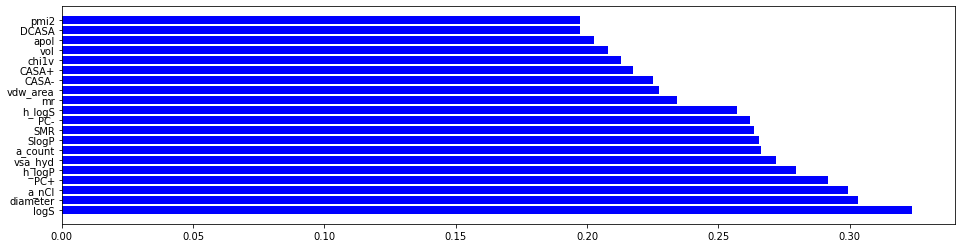

In [28]:
%matplotlib inline
plt.figure(figsize=(16,4))
plt.barh(list(bestSelect_scores.index), list(bestSelect_scores["score"]), color='b')
plt.show()

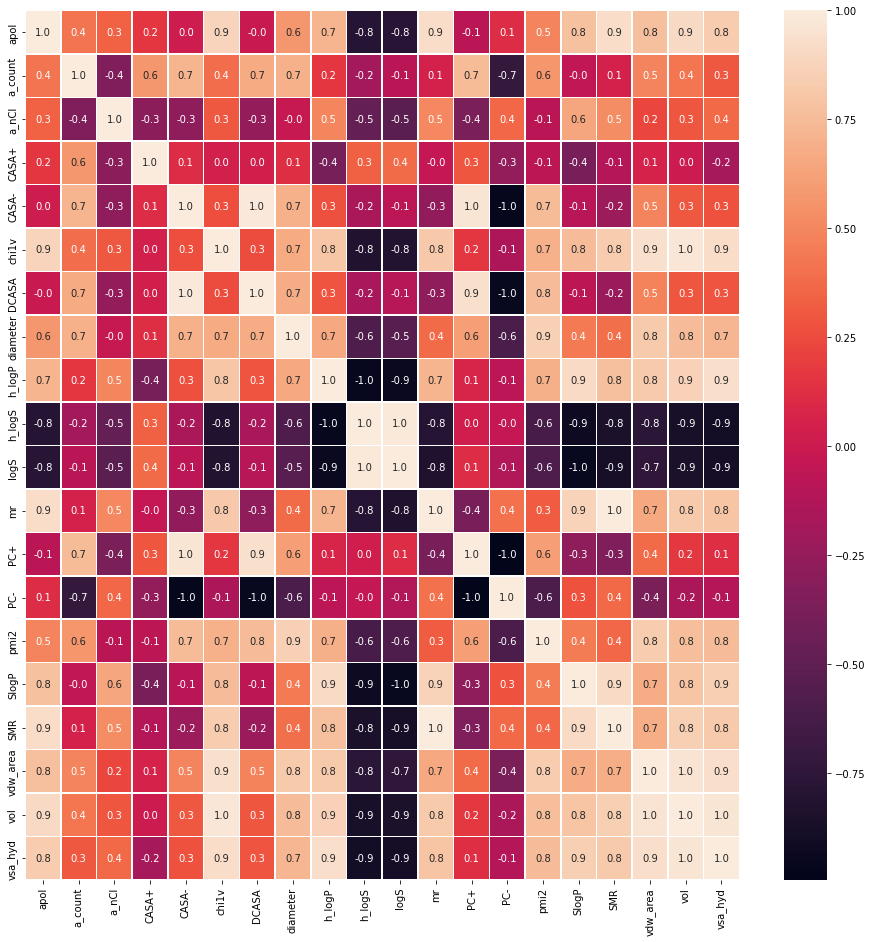

In [29]:
%matplotlib inline
f, ax = plt.subplots(figsize = (16, 16))
sns.heatmap(X_bestkSelect.corr(), annot = True, linewidth = 0.5, fmt =".1f", ax=ax)

**For the attributes correlation coefficients greater than 0.8 or less than -0,8,only one of them is retained? (the one with high score in Kbest??)???**

In [54]:
X_bestkSelect.to_csv('X_bestkSelect20.csv')

In [32]:
y.to_csv('y.csv')

In [33]:
corr = X_bestkSelect.corr()
corr

,apol,a_count,a_nCl,CASA+,CASA-,chi1v,DCASA,diameter,h_logP,h_logS,logS,mr,PC+,PC-,pmi2,SlogP,SMR,vdw_area,vol,vsa_hyd
apol,1.000000,0.418551,0.343364,0.162653,0.013055,0.880222,-0.010869,0.577012,0.711914,-0.799322,-0.781023,0.926893,-0.081261,0.112446,0.486769,0.775555,0.925045,0.768905,0.902824,0.829332
a_count,0.418551,1.000000,-0.352073,0.572014,0.712675,0.387606,0.666688,0.702500,0.164228,-0.182639,-0.077038,0.055100,0.744187,-0.716072,0.568347,-0.047901,0.056301,0.487453,0.429387,0.301693
a_nCl,0.343364,-0.352073,1.000000,-0.292986,-0.270468,0.299465,-0.254077,-0.015368,0.499125,-0.474642,-0.524889,0.506792,-0.363753,0.365317,-0.076314,0.641721,0.527164,0.234124,0.294315,0.375190
CASA+,0.162653,0.572014,-0.292986,1.000000,0.115876,0.046182,0.041023,0.127249,-0.394429,0.335928,0.383848,-0.034107,0.297697,-0.260707,-0.064979,-0.384404,-0.100398,0.058528,0.007434,-0.171299
CASA-,0.013055,0.712675,-0.270468,0.115876,1.000000,0.265238,0.991974,0.697848,0.269531,-0.155033,-0.073777,-0.265299,0.964451,-0.967650,0.745594,-0.089632,-0.221441,0.490779,0.299953,0.281427
chi1v,0.880222,0.387606,0.299465,0.046182,0.265238,1.000000,0.254964,0.665844,0.803770,-0.821808,-0.810725,0.815512,0.161230,-0.139580,0.701966,0.757860,0.833395,0.938013,0.973817,0.922416
DCASA,-0.010869,0.666688,-0.254077,0.041023,0.991974,0.254964,1.000000,0.678129,0.290299,-0.166362,-0.092511,-0.276348,0.944261,-0.950865,0.752600,-0.065284,-0.225762,0.485105,0.294159,0.289978
diameter,0.577012,0.702500,-0.015368,0.127249,0.697848,0.665844,0.678129,1.000000,0.659935,-0.584842,-0.528583,0.379055,0.605875,-0.597370,0.854705,0.441060,0.394289,0.825714,0.751740,0.725355
h_logP,0.711914,0.164228,0.499125,-0.394429,0.269531,0.803770,0.290299,0.659935,1.000000,-0.959560,-0.946035,0.718050,0.079558,-0.075051,0.696062,0.912436,0.770397,0.823295,0.861472,0.930884
h_logS,-0.799322,-0.182639,-0.474642,0.335928,-0.155033,-0.821808,-0.166362,-0.584842,-0.959560,1.000000,0.978083,-0.798918,0.028422,-0.034052,-0.619887,-0.928017,-0.849587,-0.771322,-0.868307,-0.898901


In [36]:
corr.loc[(corr['apol'] >= 0.8) & (corr['apol'] != 1)].index

Index(['chi1v', 'mr', 'SMR', 'vol', 'vsa_hyd'], dtype='object')

In [50]:
from collections import Counter
col_corr_max = []
for col in corr.columns:
  col_corr = list(corr.loc[(corr[col] >= 0.8) & (corr[col] != 1)].index)
  col_corr_max += col_corr
  print(col, col_corr,len(col_corr))
print(Counter(col_corr_max))    #Find the columns that have a linear relationship with more attributes

apol ['chi1v', 'mr', 'SMR', 'vol', 'vsa_hyd'] 5
a_count [] 0
a_nCl [] 0
CASA+ [] 0
CASA- ['DCASA', 'PC+'] 2
chi1v ['apol', 'h_logP', 'mr', 'SMR', 'vdw_area', 'vol', 'vsa_hyd'] 7
DCASA ['CASA-', 'PC+'] 2
diameter ['pmi2', 'vdw_area'] 2
h_logP ['chi1v', 'SlogP', 'vdw_area', 'vol', 'vsa_hyd'] 5
h_logS ['logS'] 1
logS ['h_logS'] 1
mr ['apol', 'chi1v', 'SlogP', 'SMR', 'vol'] 5
PC+ ['CASA-', 'DCASA'] 2
PC- [] 0
pmi2 ['diameter', 'vdw_area'] 2
SlogP ['h_logP', 'mr', 'SMR', 'vsa_hyd'] 4
SMR ['apol', 'chi1v', 'mr', 'SlogP', 'vol', 'vsa_hyd'] 6
vdw_area ['chi1v', 'diameter', 'h_logP', 'pmi2', 'vol', 'vsa_hyd'] 6
vol ['apol', 'chi1v', 'h_logP', 'mr', 'SMR', 'vdw_area', 'vsa_hyd'] 7
vsa_hyd ['apol', 'chi1v', 'h_logP', 'SlogP', 'SMR', 'vdw_area', 'vol'] 7
Counter({'chi1v': 7, 'vol': 7, 'vsa_hyd': 7, 'SMR': 6, 'vdw_area': 6, 'mr': 5, 'apol': 5, 'h_logP': 5, 'SlogP': 4, 'DCASA': 2, 'PC+': 2, 'CASA-': 2, 'pmi2': 2, 'diameter': 2, 'logS': 1, 'h_logS': 1})


In [47]:
from collections import Counter
col_corr_max = []
for col in corr.columns:
  col_corr = list(corr.loc[(corr[col] <= -0.8)].index)
  col_corr_max += col_corr
  #print(col, col_corr,len(col_corr))
print(Counter(col_corr_max))    #Find the columns that have a linear relationship with more attributes

Counter({'logS': 7, 'h_logS': 6, 'PC-': 3, 'chi1v': 2, 'h_logP': 2, 'SlogP': 2, 'SMR': 2, 'vol': 2, 'vsa_hyd': 2, 'mr': 1, 'CASA-': 1, 'DCASA': 1, 'PC+': 1})


In summary, the selected attributes to be deleted include： 

> 'chi1v', 'vol', 'vsa_hyd', 'SMR', 'vdw_area', 'mr', 'apol', 'h_logP','logS','h_logS'



In [51]:
drop_list = ['chi1v', 'vol', 'vsa_hyd', 'SMR', 'vdw_area', 'mr', 'apol', 'h_logP','logS','h_logS']
X_bestkSelect.drop(drop_list, axis = 1, inplace = True) 
X_bestkSelect.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(103, 10)

In [52]:
X_bestkSelect.head()

,a_count,a_nCl,CASA+,CASA-,DCASA,diameter,PC+,PC-,pmi2,SlogP
0,43,0,212.404330,6834.02000,6621.615700,15,9.979999,-10.980,21172.36300,6.9222
1,18,0,187.170520,188.03406,0.863535,5,1.200000,-1.200,408.21695,2.8398
2,22,10,68.987846,884.15338,815.165530,9,1.770000,-1.770,5006.45560,9.8876
3,23,8,110.122820,1003.01210,892.889340,6,2.380000,-2.380,2971.49510,5.0192
4,22,9,98.292709,837.49609,739.203370,9,1.743000,-1.743,5598.17870,9.2342


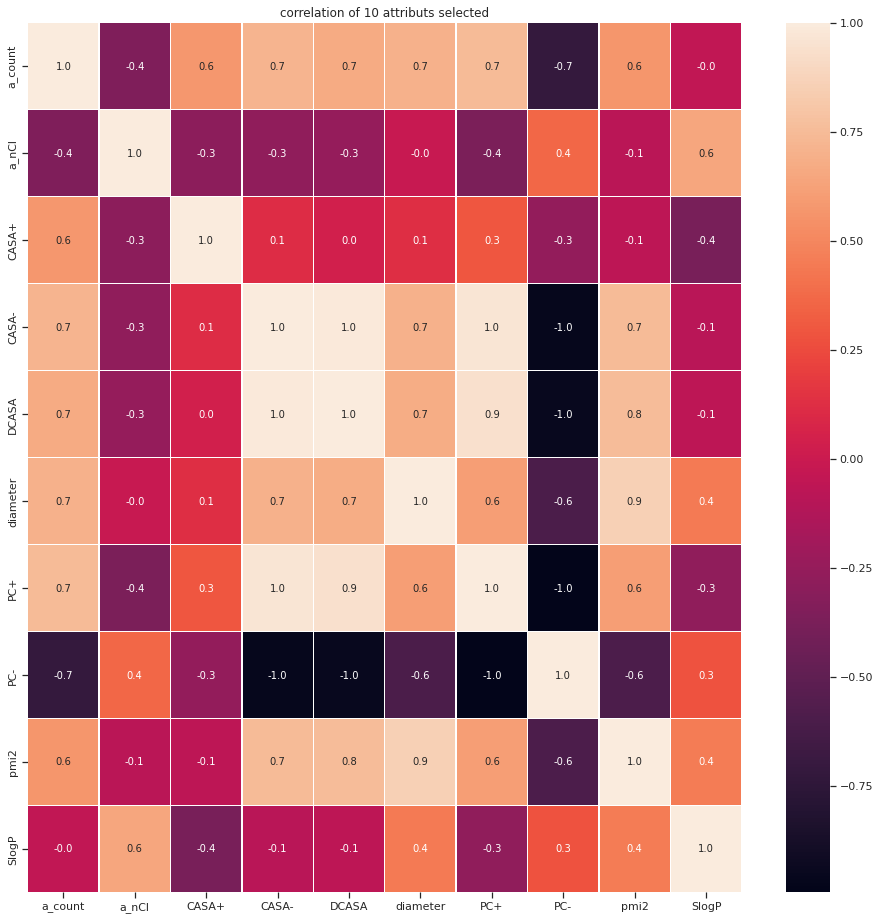

In [70]:
%matplotlib inline
f, ax = plt.subplots(figsize = (16, 16))
sns.heatmap(X_bestkSelect.corr(), annot = True, linewidth = 0.5, fmt =".1f", ax=ax)
plt.title("correlation of 10 attributs selected")
plt.savefig("10_attributs_corr.png")

In [55]:
X_bestkSelect.to_csv('X_bestkSelect10.csv')

**outliers Detection**


> **Visualization--------PCA**



In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:
# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_bestkSelect).transform(X_bestkSelect)  

pca = PCA(n_components = 3).fit(X_normalized)

X_pca = pca.transform(X_normalized)

print(X_bestkSelect.shape, X_pca.shape)

(103, 10) (103, 3)


**Plotting the PCA-transformed version of the dataset**

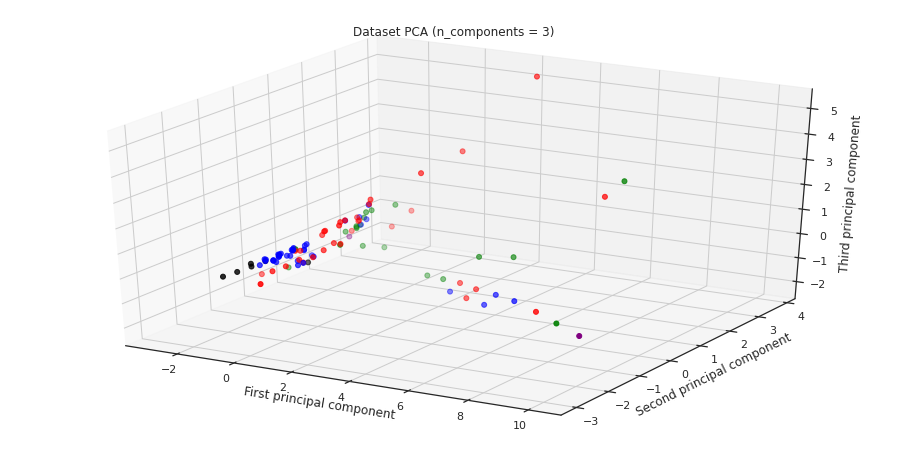

In [69]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
colors = {0:'red', 1:'green', -1:'blue', 2:'purple', -2:"black"}
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=y.map(colors), s=25)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')
plt.title('Dataset PCA (n_components = 3)')
plt.savefig("PCA_visualisation.png")
plt.show()

**DBSCAN clustering**

In [59]:
from sklearn.cluster import DBSCAN

In [65]:
dbscan = DBSCAN(eps =2, min_samples = 1)

cls_findOutlier = dbscan.fit_predict(X_normalized)

print("Cluster membership values:\n{}".format(cls_findOutlier))

Cluster membership values:
[0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 3 2 4 0 1 1 1 0 1 5 1 1 3 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [66]:
unique, counts = np.unique(cls_findOutlier, return_counts=True)
dict(zip(unique, counts))

{0: 14, 1: 83, 2: 2, 3: 2, 4: 1, 5: 1}

 **Different values of "eps" and "min_samples" were tested.
 When eps =2 and min_samples = 1, no 'Cluster membership values' equals -1.
 No outliers be removed.**

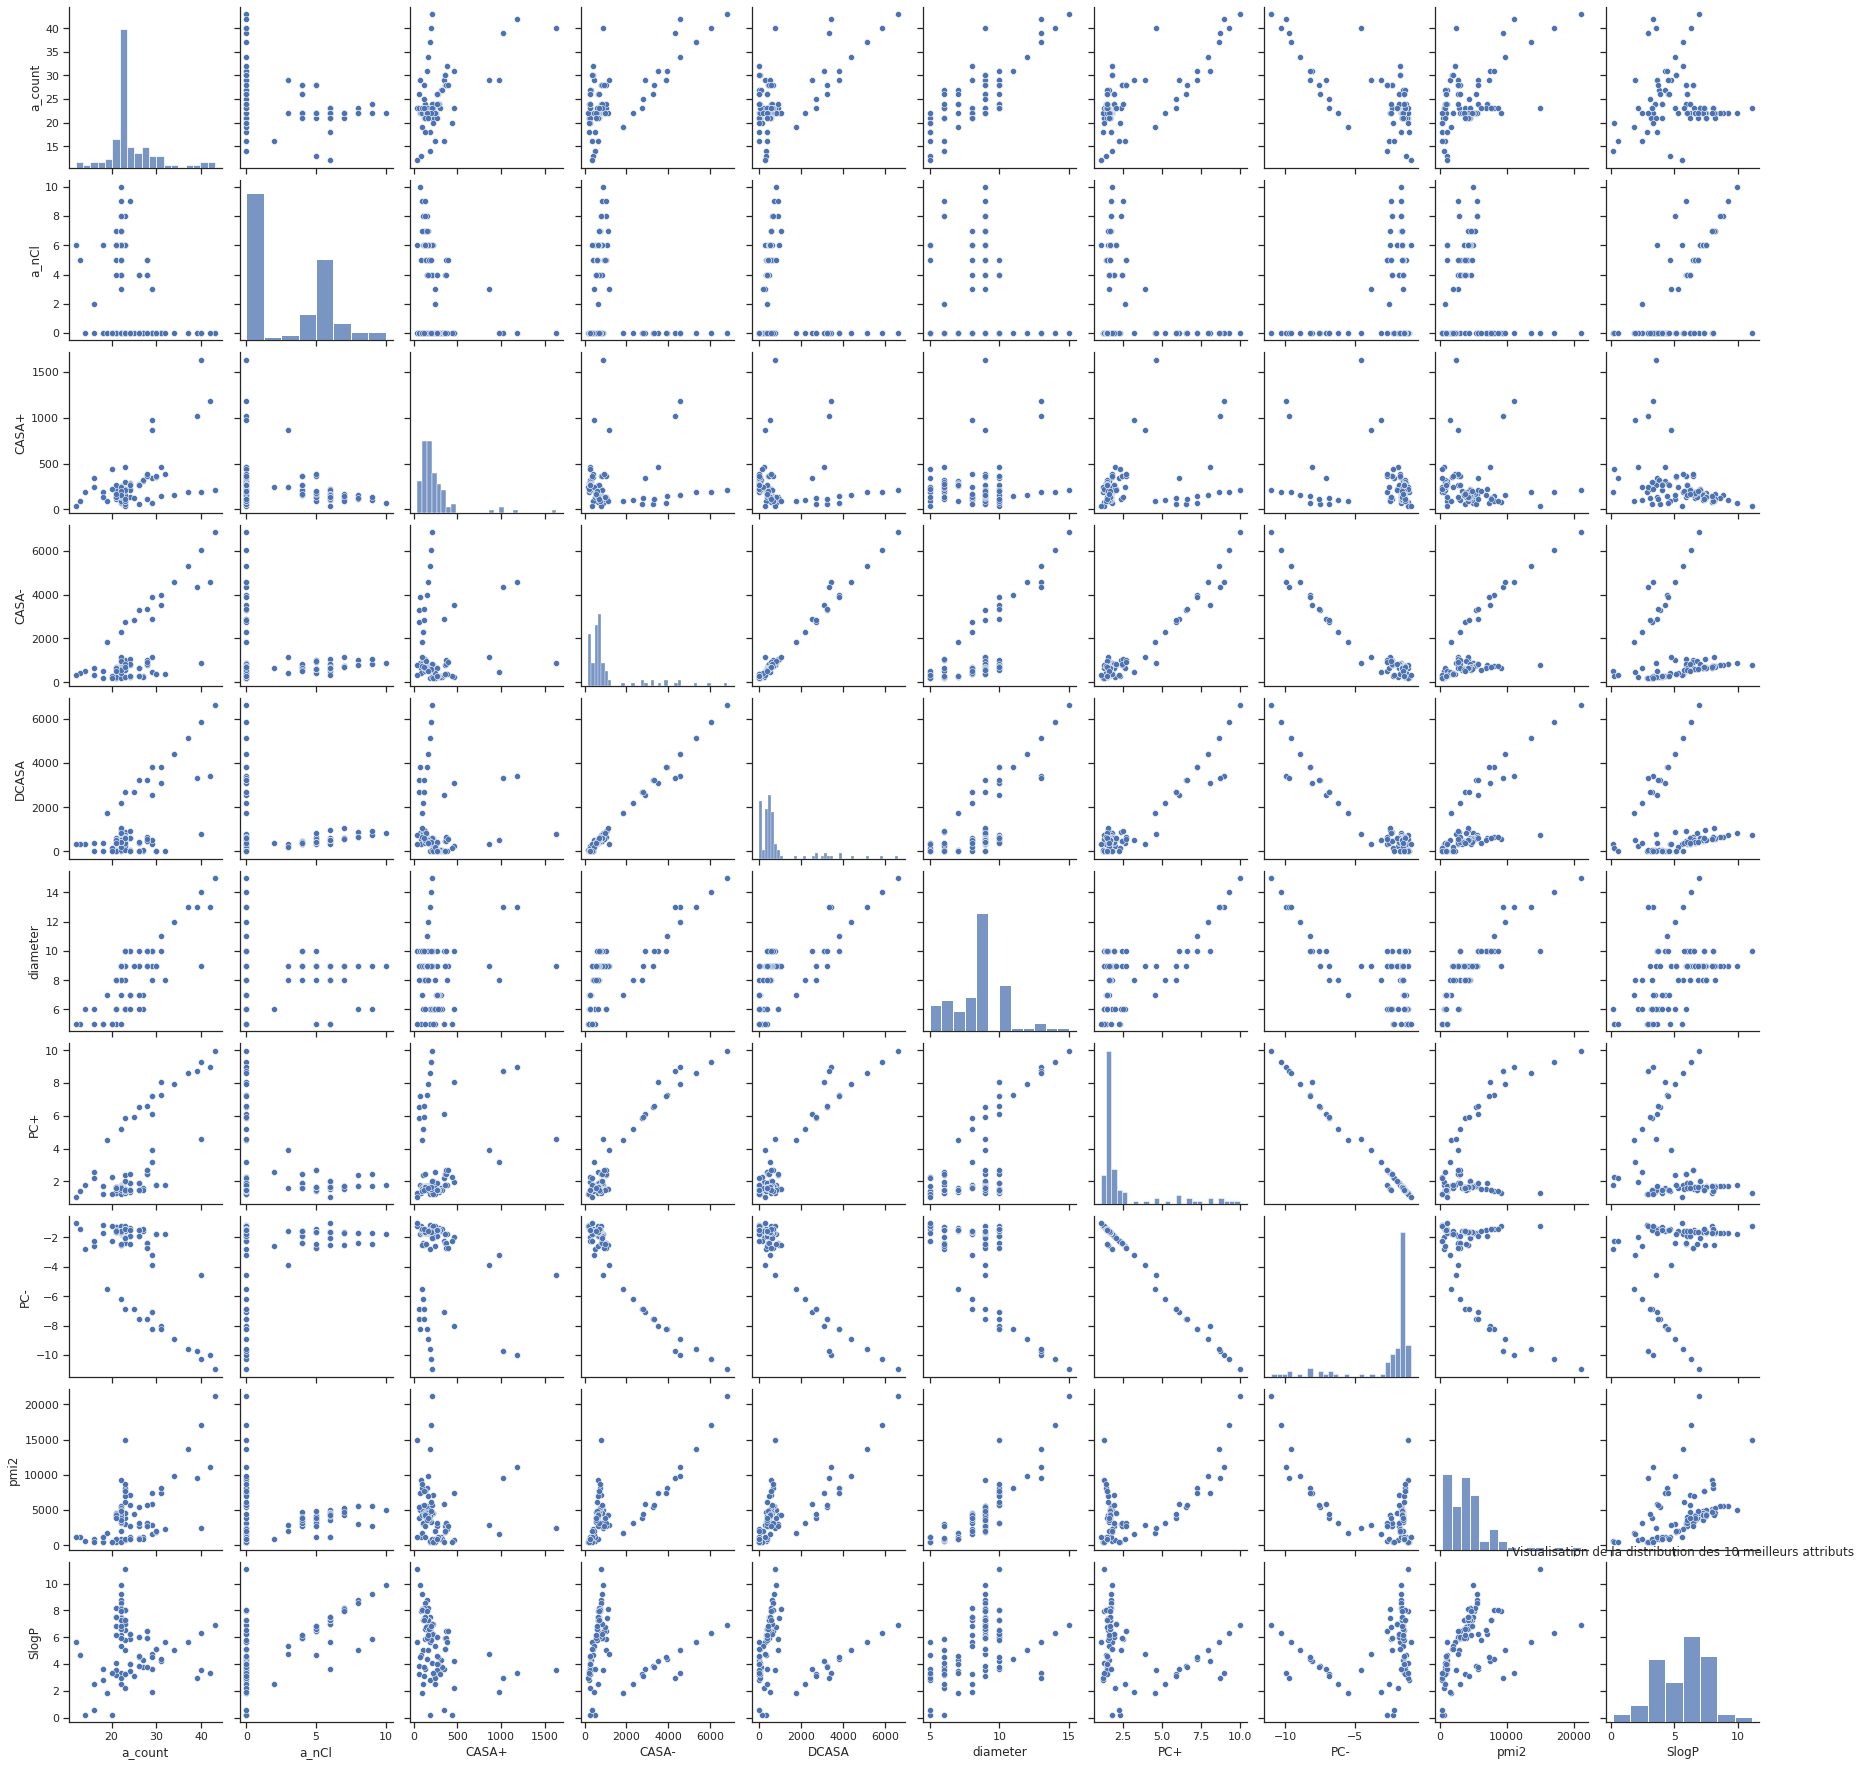

In [68]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(X_bestkSelect)

import matplotlib.pyplot as plt
plt.title("Visualisation de la distribution des 10 meilleurs attributs")
plt.savefig("10_meilleurs_attributs.png")
plt.show()

(b) En visualisant puis en évaluant quantitativement les relations de corrélation entre les 10
meilleurs attributs de représentation (voir le point précédent), déterminez s’il est nécessaire
d’appliquer une transformation d’attributs basée sur l’analyse des composantes principales
(ACP). Les relations de corrélation entre les variables sont-elles similaires pour toutes les 5
classes ?

In [72]:
data = pd.concat([X_bestkSelect, y],axis=1)
data.head()

,a_count,a_nCl,CASA+,CASA-,DCASA,diameter,PC+,PC-,pmi2,SlogP,Class
0,43,0,212.404330,6834.02000,6621.615700,15,9.979999,-10.980,21172.36300,6.9222,2
1,18,0,187.170520,188.03406,0.863535,5,1.200000,-1.200,408.21695,2.8398,2
2,22,10,68.987846,884.15338,815.165530,9,1.770000,-1.770,5006.45560,9.8876,-2
3,23,8,110.122820,1003.01210,892.889340,6,2.380000,-2.380,2971.49510,5.0192,-2
4,22,9,98.292709,837.49609,739.203370,9,1.743000,-1.743,5598.17870,9.2342,-2


In [77]:
data.columns[:-1]

Index(['a_count', 'a_nCl', 'CASA+', 'CASA-', 'DCASA', 'diameter', 'PC+', 'PC-',
       'pmi2', 'SlogP'],
      dtype='object')

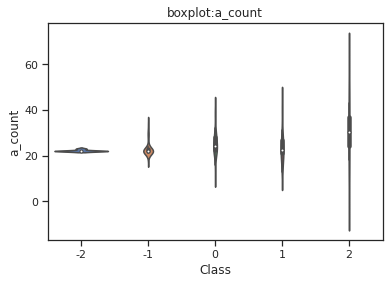

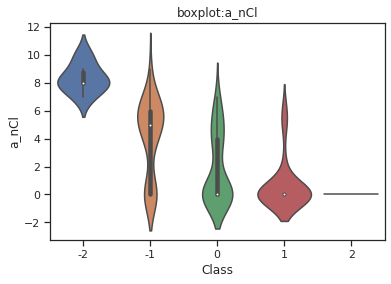

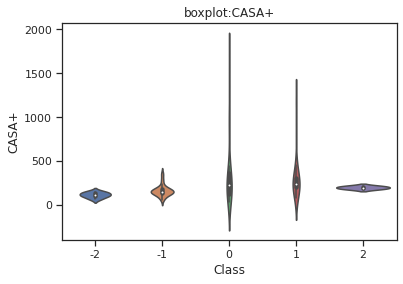

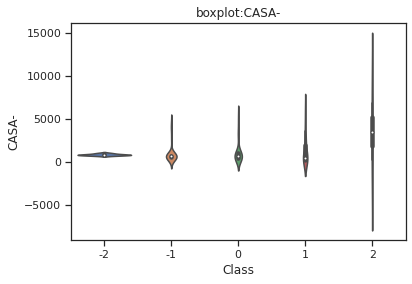

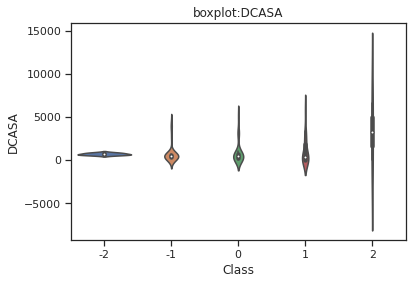

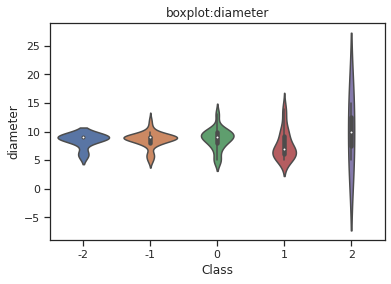

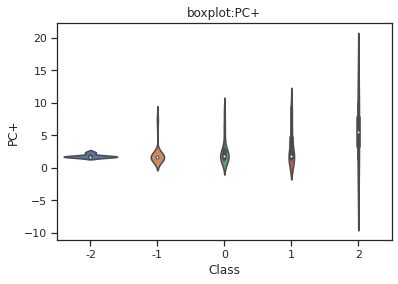

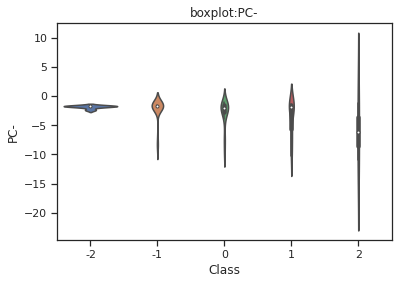

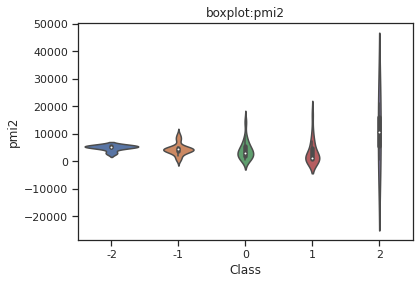

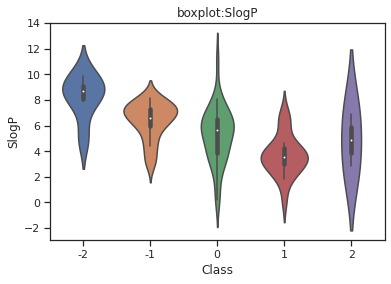

In [78]:
for col in data.columns[:-1]:
  sns.violinplot(y=col, x='Class', data=data)
  plt.title('boxplot:' + str(col))
  plt.show()

(c) En visualisant la séparation entre les 5 classes après transformation par ACP, déterminez un
nombre optimal de composantes principales (CP) à utiliser pour la classification : 2CP ou
3CP. Vérifiez votre réponse en calculant, pour chaque objet, le centroïde dont il est le plus
proche par la distance (Euclidienne) dans les cas 2CP et 3CP, puis en comparant avec les
classes réelles des objets.

**2. Mesure de distance** 

(a) D’après les résultats sur l’analyse de corrélation entre les variables de représentation (voir
question 1b), quelle mesure de distance (Manhattan, Euclidienne, ou Mahalanobis) entre
les objets serait la plus adéquate ? Vérifiez votre réponse en calculant pour chacune des
mesures de distance, le centroïde le plus proche de chaque objet, puis en comparant avec
les classes réelles des objets.

(b) Pour la distance de Mahalanobis, on peut utiliser une matrice de covariance par classe ou
une matrice de covariance pour toutes les données. Laquelle des deux options est la plus
adéquate ?

**3. Choix du modèle de classification**

(a) En utilisant la meilleure représentation des données retenue au Point 1, et la meilleure
mesure de distance retenue au Point 2, tester la méthode des k = 5 plus proches voisins ou
la méthode du plus proche centroïde, et déterminez la plus adéquate. Comme ce modèle à
était traité en cours et en laboratoire, je vous laisse donc l’implémenter.

(b) On fait l’hypothèse que les objets correspondent à des mélanges de distributions gaussiennes correspondant aux classes. Déterminez si cette hypothèse est vraissemblable en
appliquant une classification par modèle de mélange gaussien ("Gaussian Mixture Model”) aux données. Justifiez votre choix parmi les quatre options du modèle pour la
covariance des différentes classes (spherical, diag, tied, ou full). Ce modèle se trouve dans
le script python (model2.py) que vous devez l’ajouter à votre Jupiter Notebook.

**4. Application :** À l’aide du modèle retenue au Point 3, déterminez la classe de la nouvelle
observation suivante : voir test.csv